# Sentimentanalyse mit Vader

[GitHub repository](https://github.com/cjhutto/vaderSentiment)

VADER (Valence Aware Dictionary and sEntiment Reasoner) ist ein lexikon- und regelbasiertes Werkzeug für die Sentimentanalyse, das im Speziellen auf die Analyse von Social-Media-Inhalten zugeschnitten ist.

**Lexikon**: VADER enthält eine Liste an lexikalischen Features (z.B. Wörter) die hinsichtlich ihrer semantischen Ausrichtung annotiert sind: positiv, negativ und neutral. Jedem Wort im Lexikon wird ein numerischer Wert zugewiesen, der den Stimmungswert (=valence) repräsentiert. Die Werte reichen von -4 (extrem negativ) bis +4 (extrem positiv).

**Berechnung des Sentiment-Wertes**
Wenn VADER einen Text analysiert, wird dieser zunächst in einzelne Wörter (Tokens) zerlegt.

Für jedes Token wird geprüft, ob es im Lexikon enthalten ist.
Wenn das Token im Lexikon enthalten ist, verwendet VADER die mit diesem Token verbundene Stimmungsvalenz.
Die Sentiment-Scores für alle Wörter im Text werden dann aggregiert, um den zusammengesetzten Score zu berechnen.
Einbeziehung von kontextbezogenen Regeln VADER wendet auch eine Reihe von heuristischen Regeln an, die zu berücksichtigen sind:

- Verstärker (Intensifiers): Wörter, die die Intensität des Gefühls verändern, z.B. "sehr" in "sehr gut" erhöht das positive Gefühl.
- Konjunktionen: Behandlung von Fällen wie "aber", die die Stimmung eines Satzes verändern können.
- Großschreibung: Wenn ein Wort in Großbuchstaben geschrieben wird, kann es als intensiver empfunden werden.
- Zeichensetzung: Ausrufezeichen und Fragezeichen können die Stimmung beeinflussen.
- Verneinungen: Wörter wie "nicht" können die Stimmung des folgenden Wortes umkehren oder verringern.

Das Skript wurde ursprünglich im Rahmen des Projekts "Distant Spectators. Distant Reading for Periodicals of the Enlightenment" entwickelt: http://gams.uni-graz.at/context:dispecs 

### Import

In [1]:
import pandas as pd

### Download mit NLTK
(muss nur einmal gemacht werden)

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\semlakm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Importieren

[NLTK sentiment examples](http://www.nltk.org/howto/sentiment.html)

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Sentiment analyzer instanziieren

In [4]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [5]:
sentiment_analyzer.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [6]:
sentiment_analyzer.lexicon["happy"]

2.7

In [7]:
sentiment_analyzer.lexicon["challenging"]

0.6

Wir verwenden die Methode `polarity_scores`, die uns die Kategorien
* negativ
* positiv
* neutral
* compound 

zurückliefert. Der `compound score` ist die Summe aus positiven, negativen und neutralen Scores, die dann zwischen -1 (sehr negativ) und +1 (sehr positiv) normalisiert werden. 

In [8]:
sentiment = sentiment_analyzer.polarity_scores("This is very bad.")
sentiment

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}

### Beispiele

In [9]:
sentiment = sentiment_analyzer.polarity_scores("This is very bad!")
sentiment

{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.623}

In [10]:
sentiment = sentiment_analyzer.polarity_scores("This is very bad :( ")
sentiment

{'neg': 0.699, 'neu': 0.301, 'pos': 0.0, 'compound': -0.7889}

In [11]:
sentiment = sentiment_analyzer.polarity_scores("This is very bad :( ")
sentiment

{'neg': 0.699, 'neu': 0.301, 'pos': 0.0, 'compound': -0.7889}

In [12]:
sentiment = sentiment_analyzer.polarity_scores("Profoundly deep, genuinely moving, utterly hilarious, highly imaginative and a visual feast.")
sentiment

{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.4576}

## Beispiele mit Reddit-Kommentaren

### Kommentare laden
Wir laden ein gepickeltes pandas DataFrame. Dabei handelt es sich um ein binäres Dateiformat, das nicht mit einem einfachen Texteditor gelesen werden kann. Die Dateigröße wird jedoch durch die Komprimierung verringert, und im Vergleich zu .csv-Dateien ist es besser für Text geeignet. Reddit ist ein Social-News-Aggregator, eine Website, auf der registrierte Benutzer:innen Inhalte einstellen bzw. anbieten können.

In [13]:
comments_df = pd.read_pickle("reddit_comments.p")

In [14]:
#Exkurs: Pickledatei in .csv konvertieren und wieder einlesen 
# pickle_file_path = 'reddit_comments.p'
# df = pd.read_pickle(pickle_file_path)
# csv_file_path = 'reddit_comments.csv'
# df.to_csv(csv_file_path, index=False)
# df = pd.read_csv('reddit_comments.csv')

In [15]:
comments_df

,subreddit,timestamp,text,score,author
id,,,,,
edgib58,worldnews,1546850689,i'm not the person you responded to originally...,3,SavannaJeff
ed8zim7,worldnews,1546632424,australia! ill edit in what it says when i go ...,1,CertifiedAsshole17
ed6grs9,worldnews,1546552099,i'm also legally allowed to blow you off every...,8,Thoughtofajoke
edd04d3,worldnews,1546752013,interdependence is theorized as actually a big...,21,Juniperlightningbug
edx493r,worldnews,1547325502,they are sexlessnot according to tolkien. ther...,5,Statman12
...,...,...,...,...,...
edaqtfz,funny,1546695560,this whole thread is giving me rage palpatatio...,11,Thetechguru_net
edi1g9o,funny,1546891265,"yea, she would be better off helping the guy r...",7,Monteze
eecioti,funny,1547812194,"and every time it gets reposted, someone says ...",3,nonroker


### UNIX Zeitstempel konvertieren timestamp
Das ist notwendig um einen besser lesbaren Zeitstempel für die Kommentare zu haben. 

In [16]:
comments_df["timestamp"] = pd.to_datetime(comments_df["timestamp"], unit="s")

In [17]:
comments_df

,subreddit,timestamp,text,score,author
id,,,,,
edgib58,worldnews,2019-01-07 08:44:49,i'm not the person you responded to originally...,3,SavannaJeff
ed8zim7,worldnews,2019-01-04 20:07:04,australia! ill edit in what it says when i go ...,1,CertifiedAsshole17
ed6grs9,worldnews,2019-01-03 21:48:19,i'm also legally allowed to blow you off every...,8,Thoughtofajoke
edd04d3,worldnews,2019-01-06 05:20:13,interdependence is theorized as actually a big...,21,Juniperlightningbug
edx493r,worldnews,2019-01-12 20:38:22,they are sexlessnot according to tolkien. ther...,5,Statman12
...,...,...,...,...,...
edaqtfz,funny,2019-01-05 13:39:20,this whole thread is giving me rage palpatatio...,11,Thetechguru_net
edi1g9o,funny,2019-01-07 20:01:05,"yea, she would be better off helping the guy r...",7,Monteze
eecioti,funny,2019-01-18 11:49:54,"and every time it gets reposted, someone says ...",3,nonroker


### Sentiment berechnen
Wir definieren eine Funktion, die nur den Compound Score des VADER Sentiment Analyzers zurückgibt:

In [18]:
def compute_sentiment(text):
    return sentiment_analyzer.polarity_scores(text)["compound"]

**Tip:** Wir können das *tqdm* Paket installieren um den Rechenprozess anzuzeigen. Das ist optional aber sehr nützlich. 

In [19]:
from tqdm.auto import tqdm
tqdm.pandas()

Dann verwenden wir `progress_apply` (wenn tqdm verwendet wird) oder das normale `apply` (wenn tqdm nicht verwendet wird), um die Stimmung zu berechnen:

In [20]:
comments_df["sentiment"] = comments_df["text"].progress_apply(compute_sentiment)

  0%|          | 0/100000 [00:00<?, ?it/s]

### Sentiment Analyse

Ein guter Start ist `describe` zu verwenden ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)) um deskriptive Statistiken auszugeben:

* count: Anzahl der Beobachtungen
* mean: Mittelwert
* std: Standardabweichung
* max: Maximalwerte
* min: Minimalwerte
* 25%: 25%-Perzentil
* 50%: Median
* 75%: 75%-Perzentil



In [21]:
comments_df["sentiment"].describe()

count    100000.000000
mean          0.014621
std           0.679588
min          -0.999900
25%          -0.674400
50%           0.030450
75%           0.689700
max           1.000000
Name: sentiment, dtype: float64

Wir können auch ein Histogramm der Sentimentverteilung erstellen, indem wir die `plot`-Funktion ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)) verwenden:

<Axes: ylabel='Frequency'>

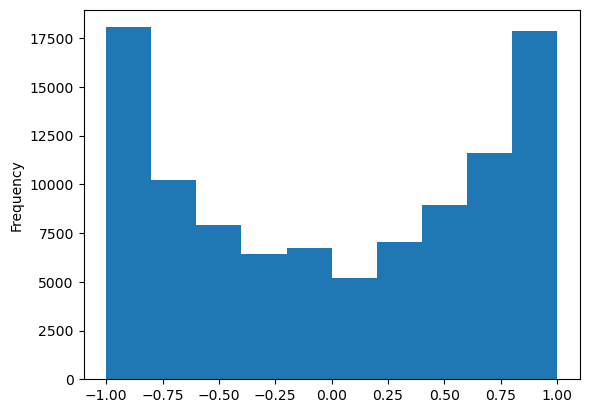

In [22]:
comments_df["sentiment"].plot(kind="hist")

Um zwischen Subreddits zu unterscheiden, können wir `groupby` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby)) verwenden:

In [23]:
comments_df.groupby("subreddit")["sentiment"].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
funny,50000.0,0.079749,0.664433,-0.9999,-0.579925,0.16640,0.7269,1.0000
worldnews,50000.0,-0.050506,0.688284,-0.9999,-0.750600,-0.07765,0.6369,0.9996


subreddit
funny        Axes(0.125,0.11;0.775x0.77)
worldnews    Axes(0.125,0.11;0.775x0.77)
Name: sentiment, dtype: object

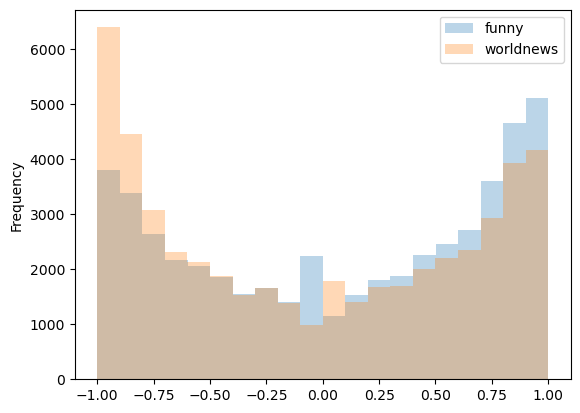

In [24]:
comments_df.groupby("subreddit")["sentiment"].plot(kind="hist", alpha=0.3, legend=True, bins=20)

### Sentiment über Zeit

Zuerst muss der Zeitstempel auf Tage normalisiert werden: 

In [25]:
comments_df["normalized_timestamp"] = comments_df["timestamp"].dt.normalize()

In [26]:
comments_df

,subreddit,timestamp,text,score,author,sentiment,normalized_timestamp
id,,,,,,,
edgib58,worldnews,2019-01-07 08:44:49,i'm not the person you responded to originally...,3,SavannaJeff,0.8136,2019-01-07
ed8zim7,worldnews,2019-01-04 20:07:04,australia! ill edit in what it says when i go ...,1,CertifiedAsshole17,-0.5848,2019-01-04
ed6grs9,worldnews,2019-01-03 21:48:19,i'm also legally allowed to blow you off every...,8,Thoughtofajoke,-0.9566,2019-01-03
edd04d3,worldnews,2019-01-06 05:20:13,interdependence is theorized as actually a big...,21,Juniperlightningbug,-0.5106,2019-01-06
edx493r,worldnews,2019-01-12 20:38:22,they are sexlessnot according to tolkien. ther...,5,Statman12,-0.1972,2019-01-12
...,...,...,...,...,...,...,...
edaqtfz,funny,2019-01-05 13:39:20,this whole thread is giving me rage palpatatio...,11,Thetechguru_net,-0.8209,2019-01-05
edi1g9o,funny,2019-01-07 20:01:05,"yea, she would be better off helping the guy r...",7,Monteze,0.2500,2019-01-07
eecioti,funny,2019-01-18 11:49:54,"and every time it gets reposted, someone says ...",3,nonroker,-0.7615,2019-01-18


Dann wird die Stimmung über die Tage gemittelt unter Verwendung von `groupby` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby)) und `mean` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html?highlight=mean#pandas.DataFrame.mean)):

<Axes: xlabel='normalized_timestamp'>

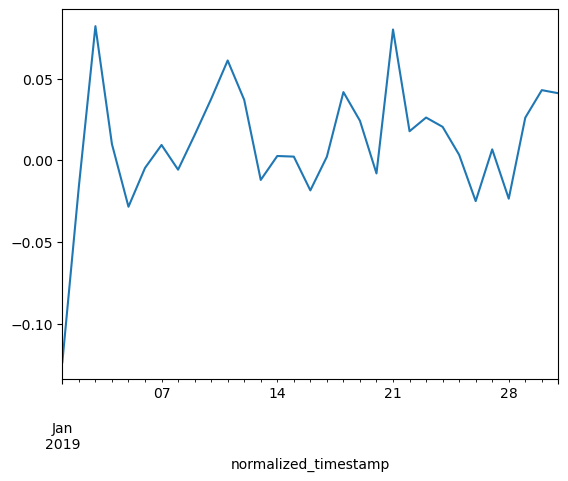

In [27]:
comments_df.groupby("normalized_timestamp")["sentiment"].mean().plot(kind="line")

Um besser zwischen Subreddits unterscheiden zu können, verwenden wir Seaborn ([website & documentation](https://seaborn.pydata.org/)), eine Pythonbibliothek zur Datenvisualisierung:

In [28]:
import seaborn as sns

Nach dem Import können wir `lineplot` ([documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)) verwenden:

<Axes: xlabel='normalized_timestamp', ylabel='sentiment'>

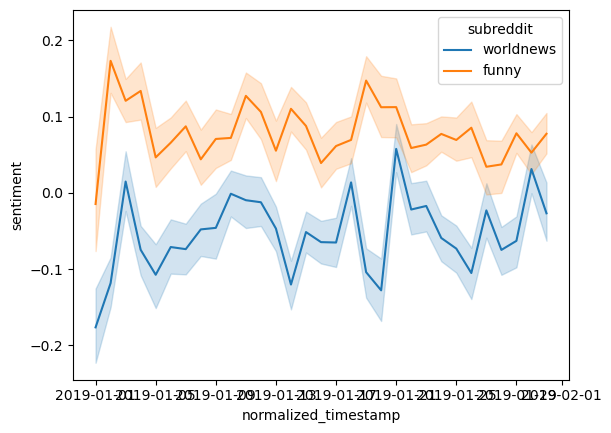

In [29]:
sns.lineplot(data=comments_df, x="normalized_timestamp", y="sentiment", hue="subreddit")